In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/"
sz=299
arch=resnext50
architecture='resnext50'
bs=28

In [7]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)


In [8]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)


100%|██████████| 22/22 [00:58<00:00,  2.64s/it]


In [10]:
learn.fit(1e-2,5) # 5starts to  Epoch overfitting


HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.656572   0.364714   0.872294  
    1      0.464851   0.199619   0.937229                  
    2      0.377312   0.144206   0.962121                  
    3      0.305462   0.103786   0.965368                  
    4      0.256818   0.07518    0.982143                  



[0.07518048, 0.9821428602392023]

In [11]:
learn.save('tmp')

In [12]:
learn.fit(1e-2,1) # starts to  Epoch overfitting

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.227008   0.065984   0.98539   



[0.06598448, 0.9853896173563871]

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 71/91 [00:00<00:00, 71.30it/s, loss=0.812]


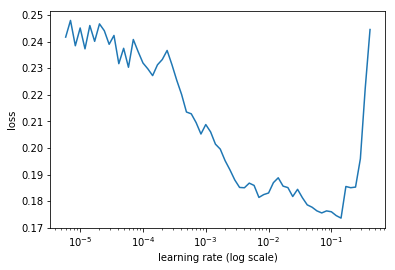

In [13]:
lr=learn.lr_find()
learn.sched.plot()


In [14]:
learn.fit(5e-3, 3, cycle_len=2) # 3 overfitting

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.20631    0.041761   0.99513   
    1      0.172461   0.041429   0.99513                   
    2      0.160015   0.039399   0.99513                   
    3      0.174588   0.036235   0.996753                  
    4      0.167499   0.031258   0.996753                  
    5      0.168239   0.028306   0.996753                  



[0.028306173, 0.9967532483014193]

In [17]:
learn.save('Finetune_top_overfit_resnext50')

In [18]:
learn.unfreeze()


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 87%|████████▋ | 79/91 [03:59<00:36,  3.03s/it, loss=1.22] 

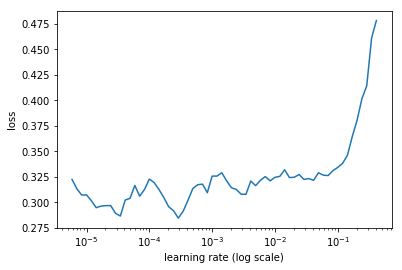

In [19]:
lr=learn.lr_find()
learn.sched.plot()


In [26]:
lr=np.array([1e-9,1e-5,1e-4])

In [21]:
learn.fit(lr, 3, cycle_len=2,wds=1e-6)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

  0%|          | 0/91 [00:00<?, ?it/s]                    


Exception in thread Thread-25:
Traceback (most recent call last):
  File "/home/ubuntu/.conda/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/.conda/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/.conda/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.380835   0.028026   0.996753  
    1      0.335574   0.027332   0.996753                  
    2      0.348043   0.027403   0.996753                  
    3      0.346669   0.028815   0.998377                  
    4      0.351078   0.024325   0.998377                  
    5      0.327162   0.028139   0.998377                  



[0.02813893, 0.9983766241507097]

In [22]:
import datetime
import time
def Timestamp():
    ts = time.time()
    #print(ts)
    st = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d-%H%M%S')
    return st


In [23]:
learn.save('{}_{}_{}'.format(architecture,sz,Timestamp()))

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 80/91 [04:31<00:37,  3.40s/it, loss=1.53] 

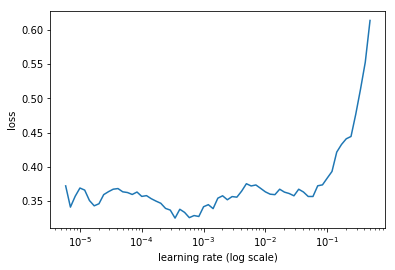

In [24]:
lr=learn.lr_find()
learn.sched.plot()


In [27]:
learn.fit(lr, 3, cycle_len=2,wds=1e-6)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

  0%|          | 0/91 [00:00<?, ?it/s]                    


Exception in thread Thread-32:
Traceback (most recent call last):
  File "/home/ubuntu/.conda/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/.conda/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/.conda/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.318045   0.026005   0.998377  
    1      0.364574   0.02495    0.998377                  
    2      0.356908   0.026458   0.996753                  
    3      0.362834   0.025369   0.998377                  
    4      0.372428   0.02967    0.996753                  
    5      0.381589   0.02498    0.998377                  



[0.024979709, 0.9983766241507097]

In [28]:
learn.save('{}_{}_{}_final'.format(arch,sz,Timestamp()))

In [30]:
log_preds,y = learn.TTA()


In [31]:
log_preds.shape

(5, 600, 6)

## Analyzing results

In [32]:
imr = ImageModelResults(data.val_ds, np.mean(log_preds,axis=0))
imr.num_classes

6

In [33]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 

In [41]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

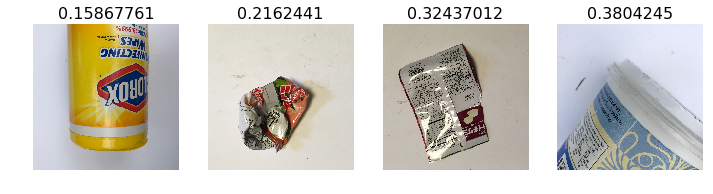

In [44]:
# most Uncertain plastic
imr.plot_most_uncertain(4)

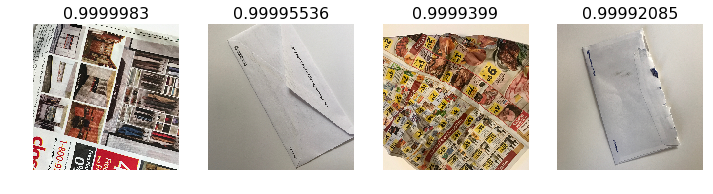

In [48]:
# Most Correct Paper
imr.plot_most_correct(3)

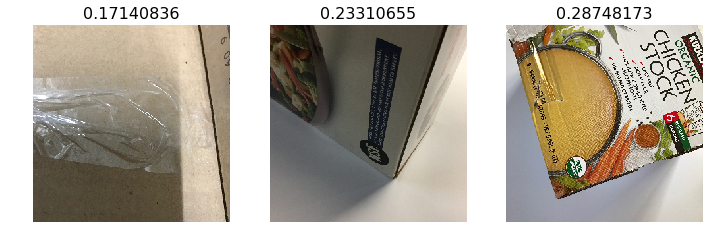

In [49]:
# most incorrect Cardboard
imr.plot_most_incorrect(0)

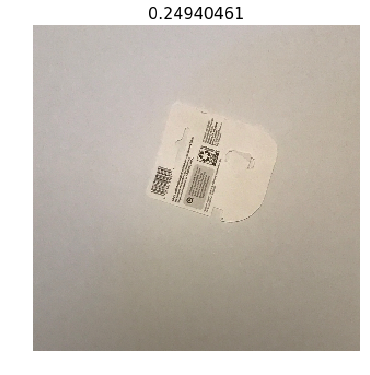

In [50]:
# Misclassifed Paper
imr.plot_by_correct(3,is_correct=False)

In [38]:
def calc_accuracy(y_pred,y_real):
    total=y_real.shape
    fail,crct=np.bincount(y_pred==y_real)
    return crct/total

In [39]:
preds=np.argmax(np.mean(np.exp(log_preds),axis=0),axis=1)
calc_accuracy(preds,y)

array([0.97])